In [1]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
print(os.getcwd())

/home/samuelg/Prosperity3Enigma/Tutorial


In [4]:
# feature to compare
feature = "mid_price"

                     day                                    timestamp  \
                   count mean  std  min  25%  50%  75%  max     count   
product                                                                 
KELP              2000.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0    2000.0   
RAINFOREST_RESIN  2000.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0    2000.0   

                           ... mid_price          profit_and_loss              \
                     mean  ...       75%      max           count        mean   
product                    ...                                                  
KELP              99950.0  ...    2021.5   2028.5          2000.0   340.89931   
RAINFOREST_RESIN  99950.0  ...   10000.0  10003.5          2000.0  1492.87600   

                                                                            \
                         std        min         25%       50%          75%   
product                                                                 

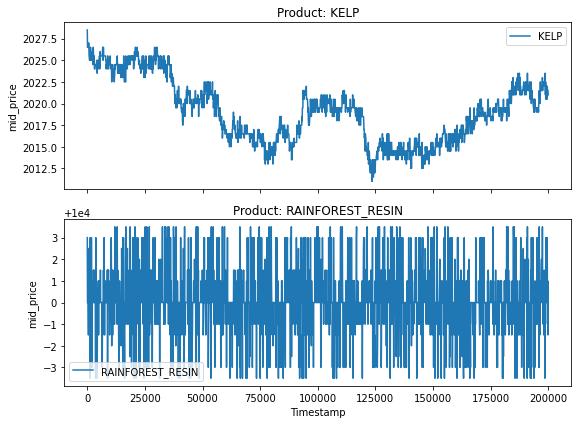

In [10]:
def plot(df, feature):
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=len(df), ncols=1, figsize=(8, 6), sharex=True)

    # Loop through each group and plot its data
    for (product, group), ax in zip(df, axes):
        # Example: Plot 'timestamp' vs. 'mid_price' for each group
        ax.plot(group['timestamp'], group[feature], label=product)
        ax.set_title(f"Product: {product}")
        ax.set_ylabel(f"{feature}")
        ax.legend()

    # Add labels and adjust layout
    plt.xlabel("Timestamp")
    plt.tight_layout()
    plt.show()


new_tutorial_data_df = pd.read_csv("../data_25/00_Tutorial.csv", sep=";")

# Group by 'product' and apply describe to each group
grouped_new = new_tutorial_data_df.groupby('product')
# Output the results
print(grouped_new.describe())
plot(grouped_new, feature)

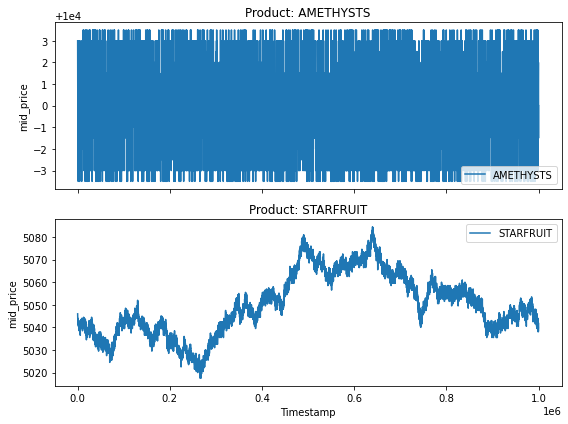

               day                                    timestamp            \
             count mean  std  min  25%  50%  75%  max     count      mean   
product                                                                     
AMETHYSTS  10000.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0   10000.0  499950.0   
STARFRUIT  10000.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0   10000.0  499950.0   

           ... mid_price          profit_and_loss                           \
           ...       75%      max           count mean  std  min  25%  50%   
product    ...                                                               
AMETHYSTS  ...   10000.0  10003.5         10000.0  0.0  0.0  0.0  0.0  0.0   
STARFRUIT  ...    5061.0   5084.5         10000.0  0.0  0.0  0.0  0.0  0.0   

                     
           75%  max  
product              
AMETHYSTS  0.0  0.0  
STARFRUIT  0.0  0.0  

[2 rows x 128 columns]


In [5]:
old_tutorial_data_df = pd.read_csv("../data_24/prices_round_1_day_-1.csv", sep=";")


grouped_old = old_tutorial_data_df.groupby('product')
# Output the results
plot(grouped_old, feature)
print(grouped_old.describe())


In [7]:
kelp_df = new_tutorial_data_df.query("product == 'KELP'")

(array([  4.,   7.,  21.,  36.,  67., 214., 131., 219.,  44.,  61., 141.,
         81., 239., 134.,  66., 122.,  43.,  48.,  42., 123., 125.,  15.,
         16.,   0.,   1.]),
 array([2011. , 2011.7, 2012.4, 2013.1, 2013.8, 2014.5, 2015.2, 2015.9,
        2016.6, 2017.3, 2018. , 2018.7, 2019.4, 2020.1, 2020.8, 2021.5,
        2022.2, 2022.9, 2023.6, 2024.3, 2025. , 2025.7, 2026.4, 2027.1,
        2027.8, 2028.5]),
 <BarContainer object of 25 artists>)

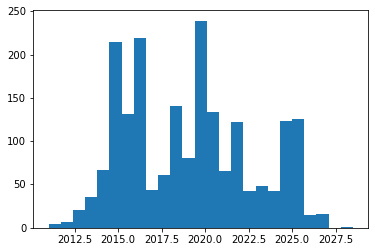

In [11]:
plt.hist(kelp_df["mid_price"], bins=25)